In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
from mintpy.utils import plot as pp
from mintpy.view import prep_slice, plot_slice
from mintpy.objects.colors import ColormapExt
plt.rcParams.update({'font.size': 12})

work_dir = os.path.expanduser('~/Papers/2023-Yang-Tropo/data/DEM')
os.chdir(work_dir)
print('Go to directory:', work_dir)

dem_file = 'gsi10m.dem.wgs84'
out_fig = 'dem.png'

Go to directory: /Users/yunjunz/Papers/2023-Yang-Tropo/data/DEM


view.py gsi10m.dem.wgs84 --dem gsi10m.dem.wgs84 --dem-blend -c wiki-2.0 -v -850 1850 --sub-lat 31.83 32.07 --sub-lon 130.73 131.0 --fontsize 10 --show-gps --gps-ms 4 --notitle --lalo-label --ylabel-rot 90 --lalo-off -18 -18 --noverbose --nocbar --scalebar 0.2 0.2 0.85 --scalebar-lw 1
save figure to file dem.png


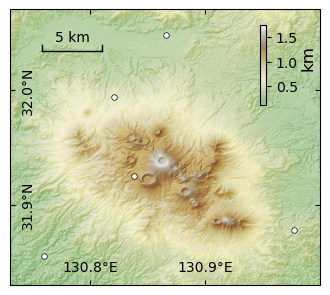

In [3]:
cmap_name = 'wiki-2.0'
vmin, vmax = -850, 1850

cmd = f'view.py {dem_file} --dem {dem_file} --dem-blend -c wiki-2.0 -v -850 1850 '
cmd += '--sub-lat 31.83 32.07 --sub-lon 130.73 131.0 --fontsize 10 --show-gps --gps-ms 4 '
cmd += '--notitle --lalo-label --ylabel-rot 90 --lalo-off -18 -18 --noverbose --nocbar '
cmd += '--scalebar 0.2 0.2 0.85 --scalebar-lw 1'

subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=[4, 4], subplot_kw=subplot_kw)
data, atr, inps = prep_slice(cmd)
ax, inps, im, cbar = plot_slice(ax, data, atr, inps)

# colorbar
inps.disp_unit = None
inps.disp_dem_blend = False
# manual create a matplotlib mappable for the truncated colorbar
cmap = ColormapExt(inps.colormap.name).colormap
p0 = (inps.dlim[0] - inps.vlim[0]) / (inps.vlim[1] - inps.vlim[0])
p1 = (inps.dlim[1] - inps.vlim[0]) / (inps.vlim[1] - inps.vlim[0])
colors_trun = cmap(np.linspace(p0, p1, 256))
cmap_trun = mpl.colors.LinearSegmentedColormap.from_list(
    name=inps.colormap.name+'_trun',
    colors=colors_trun,
    N=256, 
)
norm = mpl.colors.Normalize(vmin=inps.dlim[0]/1e3, vmax=inps.dlim[1]/1e3)
im = mpl.cm.ScalarMappable(norm=norm, cmap=cmap_trun)
# plot cbar
cax = fig.add_axes([0.75, 0.6, 0.015, 0.20])
cbar = pp.plot_colorbar(inps, im, cax)[1]
cbar.set_label('km', y=0.6, labelpad=2)

# output
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=600)
plt.show()